# Intro to Pandas


[Pandas](https://pandas.pydata.org/docs/getting_started/index.html) DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

![pandas dataframe](./assets/py-pandas.png)

## Installation

In [ ]:
!pip install pandas

### Setting UP AWS access

In [ ]:
!pip install python-dotenv

In [ ]:
%load_ext dotenv
%dotenv
for env in os.environ:
    print(env)

## Major Features for Dataframe
- Almost all functionalities for `R`
- Drop in functions for major SQL (and more) functionalities
- Use Excel? You won't miss it (majorly 😁)


<b> Let's Play with actual data<b>.
    
We are going to use [Electronic Products and Pricing Data summary](https://data.world/datafiniti/electronic-products-and-pricing-data/workspace/project-summary)

In [7]:
import os
import io
import boto3
import pandas as pd

### Read from S3

In [4]:
S3_BUCKET = os.environ.get("DATA_LAKE")
S3_ROOT_PATH = os.environ.get("DATA_LAKE_ROOT_PATH") + "datascience/ktbyazhar/"

s3_client = boto3.client("s3")

In [9]:
data = s3_client.get_object(Bucket=S3_BUCKET, Key=f"{S3_ROOT_PATH}DatafinitiElectronicsProductsPricingData.csv")

#### Create Data frame from S3 payload

In [ ]:
df = pd.read_csv(io.BytesIO(data['Body'].read()))

In [ ]:
df

#### Let's plot our data frame

In [ ]:
!pip install matplotlib

In [14]:
import matplotlib.pyplot as plt

<Axes: >

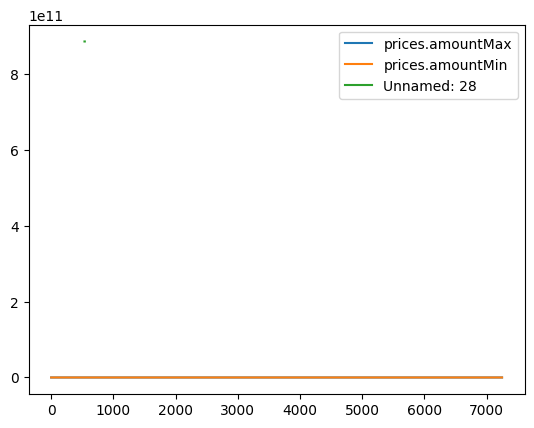

In [15]:
df.plot()

<Axes: ylabel='Frequency'>

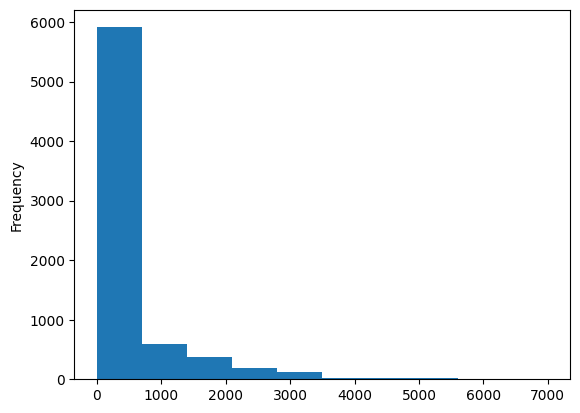

In [20]:
df["prices.amountMax"].plot(kind="hist")